In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

Cluster Dataset

In [2]:
cluster_regions = pd.read_csv(r'...\cluster_regions.csv')
cluster_regions.head()

,cluster,region
0,111,US WEST
1,112,US WEST
2,113,US WEST
3,121,US EAST
4,122,US EAST


In [3]:
cluster_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cluster  53 non-null     int64 
 1   region   53 non-null     object
dtypes: int64(1), object(1)
memory usage: 976.0+ bytes


In [4]:
cluster_regions['region'].unique()

array(['US WEST', 'US EAST', 'EUROPE', 'JAPAN', 'SINGAPORE', 'DUBAI',
       'AUSTRALIA', 'STOCKHOLM', 'AUSTRIA', 'BRAZIL', 'SOUTHAFRICA',
       'PW TELECOM ZHEJIANG', 'PW TELECOM SHANGHAI',
       'PW TELECOM GUANGDONG', 'PW TELECOM WUHAN', 'PW UNICOM',
       'PW UNICOM TIANJIN', 'CHILE', 'PERU', 'INDIA'], dtype=object)

Match Dataset

In [5]:
match = pd.read_csv(r'...\match.csv')
match.head()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


In [6]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   match_id                 50000 non-null  int64
 1   start_time               50000 non-null  int64
 2   duration                 50000 non-null  int64
 3   tower_status_radiant     50000 non-null  int64
 4   tower_status_dire        50000 non-null  int64
 5   barracks_status_dire     50000 non-null  int64
 6   barracks_status_radiant  50000 non-null  int64
 7   first_blood_time         50000 non-null  int64
 8   game_mode                50000 non-null  int64
 9   radiant_win              50000 non-null  bool 
 10  negative_votes           50000 non-null  int64
 11  positive_votes           50000 non-null  int64
 12  cluster                  50000 non-null  int64
dtypes: bool(1), int64(12)
memory usage: 4.6 MB


Next, we want to merge Cluster and Match dataset based on cluster variable so we can get region name for each observation data.

In [7]:
cluster_lookup = dict(zip(cluster_regions['cluster'], cluster_regions['region']))
cluster_lookup[0] = 'Unknown'
match['region'] = match['cluster'].apply(lambda _id: cluster_lookup[_id])
match

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster,region
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155,SINGAPORE
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154,SINGAPORE
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132,EUROPE
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191,AUSTRIA
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156,SINGAPORE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1447829192,3025,1824,0,0,63,117,22,True,0,0,111,US WEST
49996,49996,1447829181,1451,1982,384,48,63,147,22,True,0,0,204,BRAZIL
49997,49997,1447829197,2672,1830,0,0,63,130,22,True,0,0,111,US WEST
49998,49998,1447829189,2211,1982,4,3,63,645,22,True,0,0,151,SINGAPORE


In [8]:
match.describe(include='all')

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster,region
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,15
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,EUROPE
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25943,NaN,NaN,NaN,18447
mean,24999.500000,1.447573e+09,2476.453500,1000.016440,935.250060,34.529460,34.77526,93.825520,21.468000,NaN,0.015480,0.036820,142.304720,NaN
std,14433.901067,1.485270e+05,634.631261,948.211846,937.974714,29.209672,29.73214,92.648332,3.218258,NaN,0.364696,0.871068,25.156608,NaN
min,0.000000,1.446750e+09,59.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,NaN,0.000000,0.000000,111.000000,NaN
25%,12499.750000,1.447456e+09,2029.000000,0.000000,0.000000,0.000000,0.00000,9.000000,22.000000,NaN,0.000000,0.000000,123.000000,NaN
50%,24999.500000,1.447577e+09,2415.000000,1536.000000,384.000000,51.000000,51.00000,77.000000,22.000000,NaN,0.000000,0.000000,133.000000,NaN
75%,37499.250000,1.447700e+09,2872.000000,1974.000000,1972.000000,63.000000,63.00000,144.000000,22.000000,NaN,0.000000,0.000000,154.000000,NaN


In [9]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   match_id                 50000 non-null  int64 
 1   start_time               50000 non-null  int64 
 2   duration                 50000 non-null  int64 
 3   tower_status_radiant     50000 non-null  int64 
 4   tower_status_dire        50000 non-null  int64 
 5   barracks_status_dire     50000 non-null  int64 
 6   barracks_status_radiant  50000 non-null  int64 
 7   first_blood_time         50000 non-null  int64 
 8   game_mode                50000 non-null  int64 
 9   radiant_win              50000 non-null  bool  
 10  negative_votes           50000 non-null  int64 
 11  positive_votes           50000 non-null  int64 
 12  cluster                  50000 non-null  int64 
 13  region                   50000 non-null  object
dtypes: bool(1), int64(12), object(1)
memor

The game consists of many modes, one of them is ranked match where the players have the same skill in one game. For clustering purpose, the ranked match will be used because the stats of each player (who plays the hero) should be not too different because the same skill between each players. The ranked match mode is 22.

In [10]:
match = match[match['game_mode']==22]

In [11]:
data_match = match[['match_id', 'duration', 'first_blood_time', 'radiant_win', 'negative_votes', 'positive_votes', 'region']]
data_match.info()
data_match.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48670 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          48670 non-null  int64 
 1   duration          48670 non-null  int64 
 2   first_blood_time  48670 non-null  int64 
 3   radiant_win       48670 non-null  bool  
 4   negative_votes    48670 non-null  int64 
 5   positive_votes    48670 non-null  int64 
 6   region            48670 non-null  object
dtypes: bool(1), int64(5), object(1)
memory usage: 2.6+ MB


,match_id,duration,first_blood_time,radiant_win,negative_votes,positive_votes,region
count,48670.000000,48670.000000,48670.000000,48670,48670.000000,48670.000000,48670
unique,NaN,NaN,NaN,2,NaN,NaN,15
top,NaN,NaN,NaN,True,NaN,NaN,EUROPE
freq,NaN,NaN,NaN,25267,NaN,NaN,17734
mean,24981.296548,2475.039614,93.593405,NaN,0.015451,0.036532,NaN
std,14437.244907,633.481848,92.264573,NaN,0.368486,0.879647,NaN
min,0.000000,59.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,12483.250000,2028.000000,10.000000,NaN,0.000000,0.000000,NaN
50%,24971.500000,2413.000000,77.000000,NaN,0.000000,0.000000,NaN
75%,37473.750000,2871.000000,143.000000,NaN,0.000000,0.000000,NaN


Mean of the games' duration is about 2476 seconds or 41.267 minutes. The shortest duration of the game is about 59 second, not more than 1 minute, it can mean that the players from one team were leaving the game while it had been counted, the game is counted as a game if there had been first blood and it is not counted as a game if there is a player who counted as abandon the game before the first blood kill. But, because the goal is to clustering hero based on their stats during the games, a short games like that will give bad information. Then it will be assumed for games which at least have 10 minutes duration give a good information of the stats of heroes.
The longest game's duration is about 16037 seconds or 267.283 minutes, more than 4 hours, of course it can happen as long as the team's ancient has not destroyed.

In [12]:
data_match = data_match[data_match.duration >= 600]
data_match.describe(include='all')

,match_id,duration,first_blood_time,radiant_win,negative_votes,positive_votes,region
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000,48620
unique,NaN,NaN,NaN,2,NaN,NaN,15
top,NaN,NaN,NaN,True,NaN,NaN,EUROPE
freq,NaN,NaN,NaN,25239,NaN,NaN,17706
mean,24984.690559,2477.174476,93.629186,NaN,0.015467,0.036569,NaN
std,14436.998088,630.282007,92.278577,NaN,0.368675,0.880098,NaN
min,0.000000,605.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,12487.750000,2029.000000,10.000000,NaN,0.000000,0.000000,NaN
50%,24974.500000,2414.000000,77.000000,NaN,0.000000,0.000000,NaN
75%,37478.250000,2872.000000,144.000000,NaN,0.000000,0.000000,NaN


In [13]:
data_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          48620 non-null  int64 
 1   duration          48620 non-null  int64 
 2   first_blood_time  48620 non-null  int64 
 3   radiant_win       48620 non-null  bool  
 4   negative_votes    48620 non-null  int64 
 5   positive_votes    48620 non-null  int64 
 6   region            48620 non-null  object
dtypes: bool(1), int64(5), object(1)
memory usage: 2.6+ MB


First_blood_time is the first time a hero is killed by another hero. The mean is about 94 seconds or about 1.5 minutes after the game's time has started. The minimum time is 0, it mean that the killed hero is die before the game's time start, there is about 30 seconds before tha game's time is start while the players have logged in into the game, so it might be happen like this. The longest time is about 831 seconds or in about 14 minutes after tha game's time has started.

Text(0, 0.5, 'Frequency')

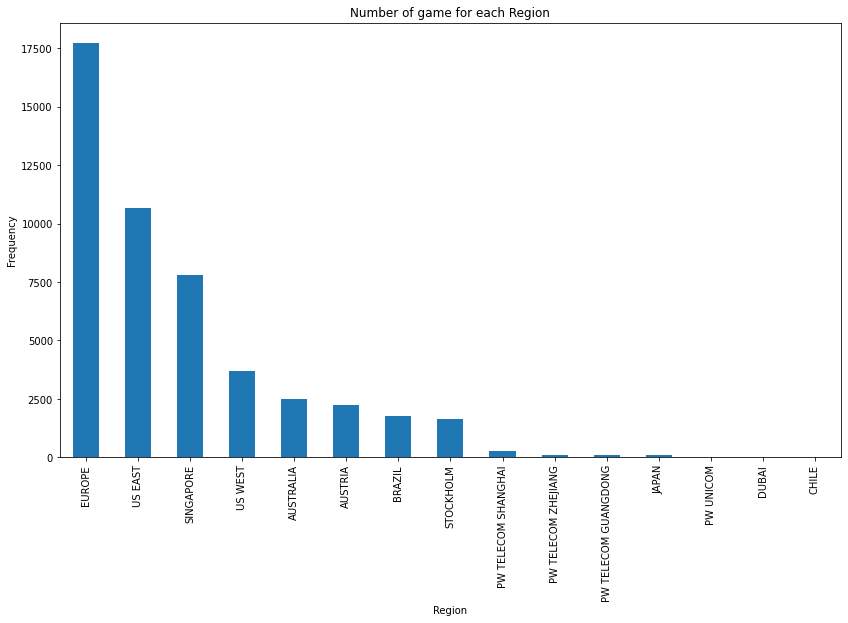

In [14]:
# Region
reg = data_match['region'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of game for each Region",
                                    )
reg.set_xlabel("Region")
reg.set_ylabel("Frequency")

After cleaning the data, the games' data are collected from 48620 games in 15 regions, where the majority games are from EUROPE, followed by US EAST and SINGAPORE. It can be said that there are more players from those regions than the rest because player choose the region based on the nearest region they play. Although the region is taken from server the game is played, players tend to choose the server based on the nearst region they live because if it is too far the connection will be bad. 

Number of Positive Votes = 1778
Number of Negative Votes = 752


Text(0.5, 1.0, 'Number of Votes')

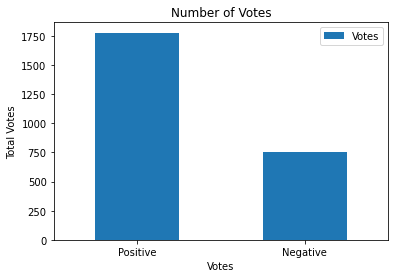

In [15]:
# Votes
npos_votes = data_match['positive_votes'].sum()
nneg_votes = data_match['negative_votes'].sum()
print('Number of Positive Votes =', npos_votes)
print('Number of Negative Votes =', nneg_votes)

df = pd.DataFrame({'lab':['Positive', 'Negative'], 'Votes':[npos_votes, nneg_votes]})
ax = df.plot.bar(x='lab', y='Votes', rot=0)
ax.set_xlabel("Votes")
ax.set_ylabel("Total Votes")
plt.title('Number of Votes')

Negative_votes or positive_votes are given after the game had finished, the one who gives it usually are the players who play the game or other players. While the games are hardly being watched by other players except the game is played by pro players, usually the players who played the game rarely vote their own game. Maximum votes are 47 and 80 for negative votes and positive votes respectively.
From the chart above, it can be seen that the games get more postive votes rather than negative one. It means even though the maximum negative vote is higher than the maximum positive vote, the total is not the same. 

Radiant team win 25239 matches
Dire team win 23381 matches


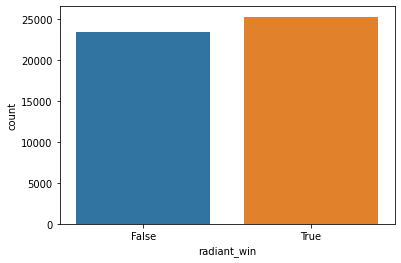

In [16]:
# Winner

sns.countplot(data_match['radiant_win'])

rad_win = data_match['radiant_win'].sum()
dire_win = len(data_match['radiant_win']) - rad_win
print('Radiant team win', rad_win, 'matches')
print('Dire team win', dire_win, 'matches')

radiant_win is an indicator to see wheter radiant team win or not, hence if radiant team lose it means the dire win. It can be seen that radiant team's win 25239 of 50000 games, more than dire's. But it doesn't seem like there is a significant difference to say that the radiant team will be more likely to win than dire team, it can be analized further.

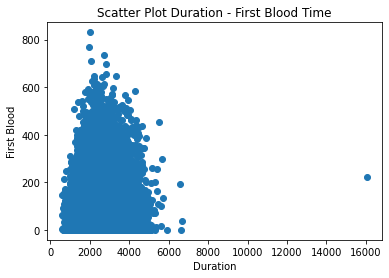

Correlation Matrix is [[1.         0.02093739]
 [0.02093739 1.        ]]


In [17]:
# Scatter Plot Duration & First Blood Time
y = data_match['first_blood_time']
x = data_match['duration']
plt.scatter(x, y)
plt.title('Scatter Plot Duration - First Blood Time')
plt.xlabel('Duration')
plt.ylabel('First Blood')

plt.show()

corr = np.corrcoef(x, y)
print('Correlation Matrix is', corr)

If we see the scatter plot of duration and first blood time, it looks like there is no linear correlation between those variables. Furthermore, the coefficient correlation is only 0.02249774. Another thing we can see is there is one point data which duration is longer than any other (outlier), and it is indeed the maximum duration that have been stated before, while for the first blood time, it seems there is no outlier.

Hero names dataset

In [18]:
hero_names = pd.read_csv(r'...\hero_names.csv')
hero_names.head()

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden


In [19]:
hero_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            112 non-null    object
 1   hero_id         112 non-null    int64 
 2   localized_name  112 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.8+ KB


Players Dataset

In [20]:
players = pd.read_csv(r'...\players.csv')
players.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 73 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   match_id                           500000 non-null  int64  
 1   account_id                         500000 non-null  int64  
 2   hero_id                            500000 non-null  int64  
 3   player_slot                        500000 non-null  int64  
 4   gold                               500000 non-null  int64  
 5   gold_spent                         500000 non-null  int64  
 6   gold_per_min                       500000 non-null  int64  
 7   xp_per_min                         500000 non-null  int64  
 8   kills                              500000 non-null  int64  
 9   deaths                             500000 non-null  int64  
 10  assists                            500000 non-null  int64  
 11  denies                             5000

Because there are too many variables in this dataset, we will only use 15 variables. Furthermore, several variables in this dataset will be used in clustering.

In [22]:
players = players[['match_id', "hero_id", "gold_per_min", "xp_per_min", 
                   "kills", "assists", "denies", "last_hits", "hero_healing", 
                   "hero_damage", "tower_damage", "level", "xp_hero", "xp_creep", 'leaver_status']]
players.head()

,match_id,hero_id,gold_per_min,xp_per_min,kills,assists,denies,last_hits,hero_healing,hero_damage,tower_damage,level,xp_hero,xp_creep,leaver_status
0,0,86,347,362,9,18,1,30,218,8690,143,16,8840.0,5440.0,0
1,0,51,494,659,13,18,9,109,0,23747,423,22,14331.0,8440.0,0
2,0,83,350,385,0,15,1,58,1595,4217,399,17,6692.0,8112.0,0
3,0,11,599,605,8,19,6,271,2714,14832,6055,21,8583.0,14230.0,0
4,0,67,613,762,20,17,13,245,243,33740,1833,24,15814.0,14325.0,0


In [23]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   match_id       500000 non-null  int64  
 1   hero_id        500000 non-null  int64  
 2   gold_per_min   500000 non-null  int64  
 3   xp_per_min     500000 non-null  int64  
 4   kills          500000 non-null  int64  
 5   assists        500000 non-null  int64  
 6   denies         500000 non-null  int64  
 7   last_hits      500000 non-null  int64  
 8   hero_healing   500000 non-null  int64  
 9   hero_damage    500000 non-null  int64  
 10  tower_damage   500000 non-null  int64  
 11  level          500000 non-null  int64  
 12  xp_hero        498117 non-null  float64
 13  xp_creep       499932 non-null  float64
 14  leaver_status  500000 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 57.2 MB


leaver_status is an indicator if the player left the game or not (it is usually called abandon). Because it doesn't stated what time the players left the game, those players will not be included because it will give bad representation of the stats of the hero they played. Say if they played the game until the end, the stats could be different.
There are na values in xp_hero and xp_creep. Because it doesn't make sense to interperate as 0 (have 0 xp_hero or 0 xp_creep) then for convenient it will be dropped.

In [24]:
players = players[players['leaver_status']==0]
players = players.dropna(axis=0, subset=['xp_hero','xp_creep'])
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487116 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   match_id       487116 non-null  int64  
 1   hero_id        487116 non-null  int64  
 2   gold_per_min   487116 non-null  int64  
 3   xp_per_min     487116 non-null  int64  
 4   kills          487116 non-null  int64  
 5   assists        487116 non-null  int64  
 6   denies         487116 non-null  int64  
 7   last_hits      487116 non-null  int64  
 8   hero_healing   487116 non-null  int64  
 9   hero_damage    487116 non-null  int64  
 10  tower_damage   487116 non-null  int64  
 11  level          487116 non-null  int64  
 12  xp_hero        487116 non-null  float64
 13  xp_creep       487116 non-null  float64
 14  leaver_status  487116 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 59.5 MB


It had been chosen before which matches will not be included in the analysis from the duration. Next, those matches will be dropped.

In [25]:
players['duration'] = 0
duration_dict = data_match.set_index('match_id').to_dict()['duration']
players['duration'] = players['match_id'].map(duration_dict)
players = players.dropna(axis=0,subset=['duration'])
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473867 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   match_id       473867 non-null  int64  
 1   hero_id        473867 non-null  int64  
 2   gold_per_min   473867 non-null  int64  
 3   xp_per_min     473867 non-null  int64  
 4   kills          473867 non-null  int64  
 5   assists        473867 non-null  int64  
 6   denies         473867 non-null  int64  
 7   last_hits      473867 non-null  int64  
 8   hero_healing   473867 non-null  int64  
 9   hero_damage    473867 non-null  int64  
 10  tower_damage   473867 non-null  int64  
 11  level          473867 non-null  int64  
 12  xp_hero        473867 non-null  float64
 13  xp_creep       473867 non-null  float64
 14  leaver_status  473867 non-null  int64  
 15  duration       473867 non-null  float64
dtypes: float64(3), int64(13)
memory usage: 61.5 MB


In players dataset, there is hero id variable. To see the localized name of the hero, we will find the correspondece localized name based on hero id from hero names dataset.

In [26]:
players['localized_name'] = 0
hero_dict = hero_names.set_index('hero_id').to_dict()['localized_name']
players['localized_name'] = players['hero_id'].map(hero_dict)
players.rename(columns={'localized_name':'hero'}, inplace=True)
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473867 entries, 0 to 499999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   match_id       473867 non-null  int64  
 1   hero_id        473867 non-null  int64  
 2   gold_per_min   473867 non-null  int64  
 3   xp_per_min     473867 non-null  int64  
 4   kills          473867 non-null  int64  
 5   assists        473867 non-null  int64  
 6   denies         473867 non-null  int64  
 7   last_hits      473867 non-null  int64  
 8   hero_healing   473867 non-null  int64  
 9   hero_damage    473867 non-null  int64  
 10  tower_damage   473867 non-null  int64  
 11  level          473867 non-null  int64  
 12  xp_hero        473867 non-null  float64
 13  xp_creep       473867 non-null  float64
 14  leaver_status  473867 non-null  int64  
 15  duration       473867 non-null  float64
 16  hero           473867 non-null  object 
dtypes: float64(3), int64(13), obj

In [27]:
players.describe(include='all')

,match_id,hero_id,gold_per_min,xp_per_min,kills,assists,denies,last_hits,hero_healing,hero_damage,tower_damage,level,xp_hero,xp_creep,leaver_status,duration,hero
count,473867.000000,473867.000000,473867.000000,473867.000000,473867.000000,473867.000000,473867.000000,473867.000000,473867.000000,473867.000000,473867.000000,473867.000000,473867.000000,473867.000000,473867.0,473867.000000,473867
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windranger
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19908
mean,24999.346815,50.521494,418.689687,454.933015,7.510859,11.896178,5.157593,130.946230,469.898784,12375.161068,1340.658852,18.202989,8863.633944,9562.138959,0.0,2485.132668,NaN
std,14429.338715,32.818481,137.273450,143.793523,5.427379,6.328141,5.897620,99.945396,1213.543494,6678.754386,1813.420368,4.233258,4837.764786,4390.726597,0.0,624.775083,NaN
min,0.000000,1.000000,106.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,25.000000,208.000000,0.0,605.000000,NaN
25%,12516.000000,21.000000,321.000000,349.000000,3.000000,7.000000,1.000000,56.000000,0.000000,7459.000000,129.000000,15.000000,5147.000000,6223.000000,0.0,2037.000000,NaN
50%,24994.000000,47.000000,398.000000,447.000000,6.000000,11.000000,3.000000,107.000000,0.000000,11077.000000,578.000000,18.000000,8223.000000,8738.000000,0.0,2420.000000,NaN
75%,37480.000000,75.000000,499.000000,553.000000,10.000000,16.000000,7.000000,180.000000,224.000000,15986.000000,1805.000000,21.000000,12024.000000,12153.000000,0.0,2875.000000,NaN


(again) Several variables will be excluded, 'hero_id','leaver_status','duration', 'match_id', because these varibles is not important to see the statistics oh hero that is played by the player, leaver status is already used before to drop the player that leave the game.

In [28]:
df = players.drop(['hero_id','leaver_status','duration', 'match_id'], axis=1).groupby('hero').mean()
df.describe(include='all')

,gold_per_min,xp_per_min,kills,assists,denies,last_hits,hero_healing,hero_damage,tower_damage,level,xp_hero,xp_creep
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,407.396185,445.934146,7.140707,11.801253,4.659940,127.726027,546.711498,11985.934800,1318.414230,18.032517,8638.556470,9394.929764
std,74.990431,76.985384,2.274773,2.559427,2.615122,63.521722,1011.031749,3332.056641,951.275112,1.670766,1267.053628,2472.243146
min,289.794677,313.140517,2.470836,5.974007,0.833621,30.031686,0.781288,4351.474444,198.939841,14.507605,3435.110121,5164.302281
25%,349.718947,378.724566,5.429139,10.094389,2.968123,73.861009,31.434675,9709.140932,434.446756,16.605634,7831.186276,6973.841260
50%,405.822910,448.048639,7.068172,11.906572,3.798515,123.146658,141.190838,11806.169343,1088.723119,18.205184,8724.824780,9509.824244
75%,461.759727,502.097863,8.904435,13.120413,6.113592,172.588188,455.834672,14201.193155,1945.460473,19.255280,9449.672293,11338.163836
max,718.696177,686.830045,12.868165,18.379799,14.640750,302.418024,5090.930694,23890.351234,3892.609574,22.098663,12736.204994,16456.279389


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, Abaddon to Zeus
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gold_per_min  110 non-null    float64
 1   xp_per_min    110 non-null    float64
 2   kills         110 non-null    float64
 3   assists       110 non-null    float64
 4   denies        110 non-null    float64
 5   last_hits     110 non-null    float64
 6   hero_healing  110 non-null    float64
 7   hero_damage   110 non-null    float64
 8   tower_damage  110 non-null    float64
 9   level         110 non-null    float64
 10  xp_hero       110 non-null    float64
 11  xp_creep      110 non-null    float64
dtypes: float64(12)
memory usage: 11.2+ KB


<AxesSubplot:>

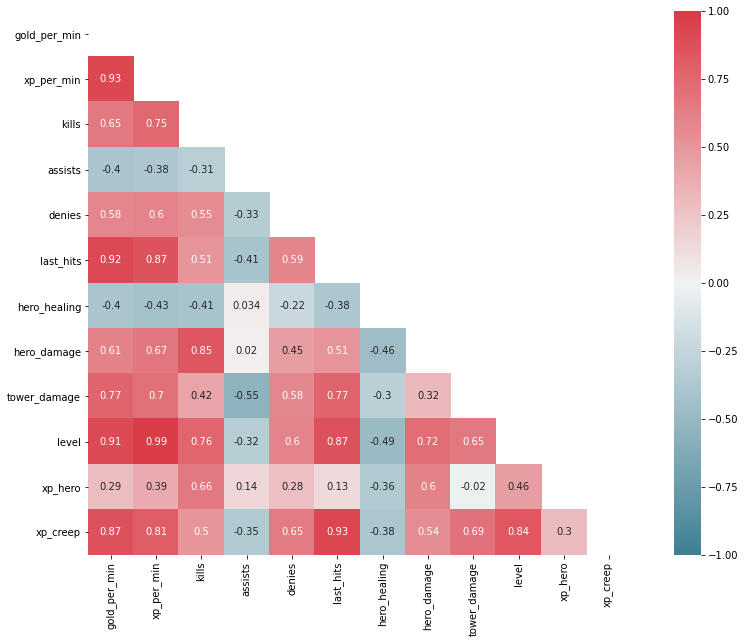

In [30]:
# Correlation between all variables from the last dataset
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))

sns.heatmap(corr, cmap= sns.diverging_palette(220, 10, as_cmap= True)
            , mask=mask, vmax=1, vmin=-1, center=0, square=True,annot=True)

From the output above, it can be seen which variables have high correlation. From Cluster Analysis Gets Complicated by Rajan Sambandam,  higher correlation can cause a problem in segmentation and there are a few ways to overcome it. Here, some variables will be eliminated for further usage, especially when using K-means for clustering purpose.
https://www.trchome.com/docs/5-cluster-analysis-gets-complicated/file

For those with correlation more than 0.8, one variable will be eliminated. We choose level, xp_per_minute, gold_per_minute, last_hits, and hero_damage to be dropped. Those variables can be explained by the remaining variables. For example, xo_per_minute can be obtained from xp_hero and xp_creep. The remaining variables will be used are kills, assists, denies, hero_healing, tower_damage, xp_hero, xp_creep. 

In [31]:
df2 = df[['kills', 'assists', 'denies', 'hero_healing', 'tower_damage', 'xp_hero', 'xp_creep']]

In [32]:
df2.describe(include='all')

,kills,assists,denies,hero_healing,tower_damage,xp_hero,xp_creep
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,7.140707,11.801253,4.659940,546.711498,1318.414230,8638.556470,9394.929764
std,2.274773,2.559427,2.615122,1011.031749,951.275112,1267.053628,2472.243146
min,2.470836,5.974007,0.833621,0.781288,198.939841,3435.110121,5164.302281
25%,5.429139,10.094389,2.968123,31.434675,434.446756,7831.186276,6973.841260
50%,7.068172,11.906572,3.798515,141.190838,1088.723119,8724.824780,9509.824244
75%,8.904435,13.120413,6.113592,455.834672,1945.460473,9449.672293,11338.163836
max,12.868165,18.379799,14.640750,5090.930694,3892.609574,12736.204994,16456.279389


To use the data for clustering, we will scale the data first. Here, we use RobustScaler which is robust to outliers.

In [33]:
df2_stdz = RobustScaler().fit(df2)

In [34]:
df2_norm = pd.DataFrame(df2_stdz.transform(df2)).rename(columns={0:'kills',1:'assists',2:'denies',3:'hero_healing',
                                                                4:'tower_damage',5:'xp_hero',6:'xp_creep'})
df2_norm.describe(include='all')

,kills,assists,denies,hero_healing,tower_damage,xp_hero,xp_creep
count,110.000000,110.000000,110.000000,110.000000,110.000000,1.100000e+02,110.000000
mean,0.020872,-0.034805,0.273862,0.955515,0.152011,-5.330186e-02,-0.026326
std,0.654555,0.845805,0.831393,2.382261,0.629561,7.828635e-01,0.566467
min,-1.322861,-1.960515,-0.942592,-0.330842,-0.588865,-3.268310e+00,-0.995692
25%,-0.471624,-0.598866,-0.263996,-0.258615,-0.433005,-5.521447e-01,-0.581071
50%,0.000000,0.000000,0.000000,0.000000,0.000000,5.620504e-16,0.000000
75%,0.528376,0.401134,0.736004,0.741385,0.566995,4.478553e-01,0.418929
max,1.668920,2.139186,3.446938,11.662912,1.855633,2.478477e+00,1.591646


In [35]:
df3 = df2_norm
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kills         110 non-null    float64
 1   assists       110 non-null    float64
 2   denies        110 non-null    float64
 3   hero_healing  110 non-null    float64
 4   tower_damage  110 non-null    float64
 5   xp_hero       110 non-null    float64
 6   xp_creep      110 non-null    float64
dtypes: float64(7)
memory usage: 6.1 KB


To find optimum number of cluster k, silhouette methode will be used.

In [36]:
km_scores= []
km_silhouette = []
for i in range(2,12):
    km = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0).fit(df3)
    preds = km.predict(df3)
    
    silhouette = silhouette_score(df3,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    print("-"*100)

Silhouette score for number of cluster(s) 2: 0.6463936289573784
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 3: 0.32000985188625
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 4: 0.3300054076914606
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 5: 0.33410855336443585
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 6: 0.26892446392501
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 7: 0.2639191523437906
----------------------------------------------------------------------------------------------------
Silhouette sc

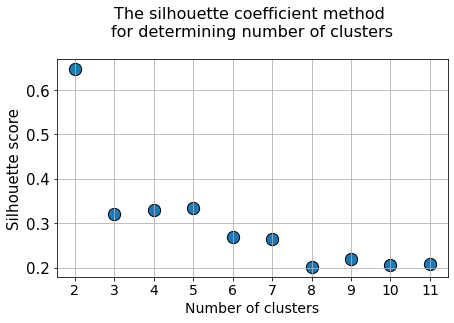

In [37]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [38]:
km = cluster.KMeans(n_clusters=2, init='k-means++', max_iter=300, tol=0.0001, random_state = 70)
km.fit(df3)
km.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

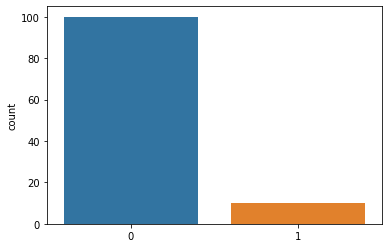

In [39]:
C_kmpp = km.predict(df3)

sns.countplot(C_kmpp)
C_kmpp[:10]

From the graph above, we can see most of the heroes are in cluster 0.

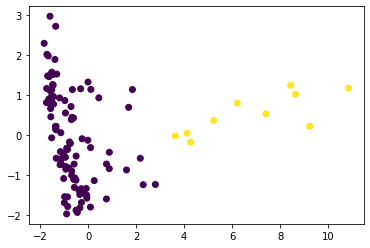

In [40]:
pca = PCA(n_components=2).fit(df3)
data2D = pca.transform(df3)
plt.scatter(data2D[:,0], data2D[:,1], c = C_kmpp)

Plot above gives scatter plot from two component in PCA, where components in CPA can be said as representation from variables we used in dataset. Purple dots are heroes from cluster 0 and the yellow one are heroes from cluster 1. It can be clearly seen that the two clusters are not overlapping. Cluster 0 seems consist of data with low value of component 1 of PCA where heroes in cluster 1 have higher value of Component 1 from PCA. We cannot interpret directly from PCA to see the statistics from variables in each cluster.

In [41]:
df4 = df[['kills','assists','denies','hero_healing','tower_damage','xp_hero','xp_creep']]

In [42]:
df4['Kmeans'] = km.labels_
df4.groupby(['Kmeans']).mean()

,kills,assists,denies,hero_healing,tower_damage,xp_hero,xp_creep
Kmeans,,,,,,,
0,7.390428,11.831755,4.788833,263.003687,1385.88455,8774.377713,9646.840535
1,4.643501,11.496225,3.371010,3383.789611,643.71103,7280.344038,6875.822053


From the table, it can be seen that (in terms of mean) heroes in cluster 0 have more kills, tower_damage, xp_hero, and xp_creep than heroes in cluster 1. And heroes in cluster 1 have the most hero_healing value. Alas, we say that cluster 1 consist of heroes with class Healer and we make cluster 0 as a class of Others.

In [43]:
df4['heroclass'] = 'na'
df4.loc[(df4['Kmeans']==0),'hero_class'] = 'Others'
df4.loc[(df4['Kmeans']==1),'hero_class'] = 'Healer'

In [44]:
Heroes_clustering = df4[['hero_class','kills','assists','denies','hero_healing','tower_damage',
                         'xp_hero','xp_creep']].sort_values(['hero_class'])
Heroes_clustering

,hero_class,kills,assists,denies,hero_healing,tower_damage,xp_hero,xp_creep
hero,,,,,,,,
Abaddon,Healer,5.048458,12.771869,3.292952,2275.076778,1022.677155,8522.181561,8217.681875
Necrophos,Healer,8.848611,15.432639,5.503646,3282.884201,751.648264,8569.197743,9137.241146
Io,Healer,3.432193,12.652091,2.173638,4363.607731,311.479721,6751.043726,5164.302281
Dazzle,Healer,2.673713,10.959390,3.857930,5090.930694,432.473994,6398.164361,6006.775685
Chen,Healer,3.893382,9.648897,1.029412,3575.395221,1202.161765,5937.266544,6896.759191
...,...,...,...,...,...,...,...,...
Faceless Void,Others,8.350645,8.759510,7.134634,2.992061,1578.201125,8997.021502,12450.355276
Enigma,Others,4.462226,15.337530,3.534119,566.654752,1037.642973,8352.897644,9572.248985
Enchantress,Others,7.311917,8.720207,3.981347,1280.220725,941.842487,8506.004145,9545.580311


Finally, we get all the heroes and which class they are from our clustering, Healer or Others. 